#### HW 6 32140704 김성환

Q 11.3

N = 1 , c = 3.000000
error = 2.0000

N = 2 , c = 4.000000
error = 0.3333

N = 3 , c = 3.500000
error = 0.1250

N = 4 , c = 3.750000
error = 0.0714

N = 5 , c = 3.875000
error = 0.0333



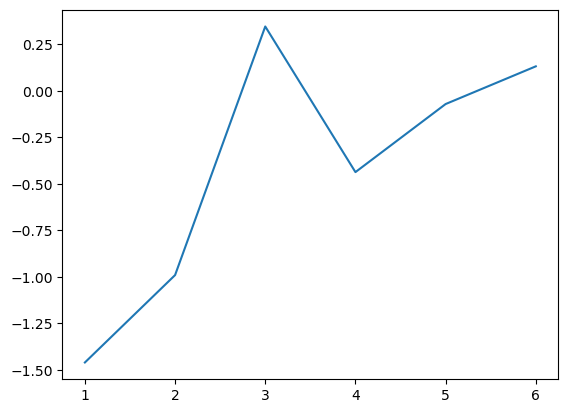

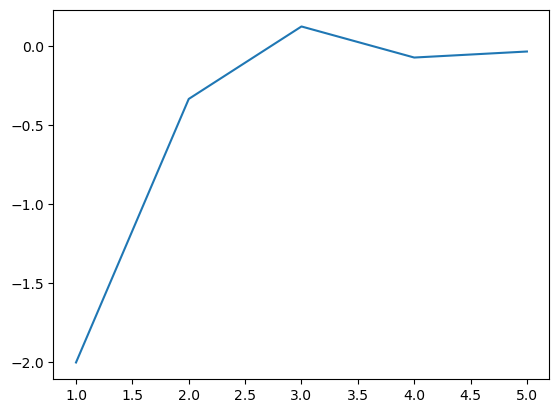

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

def f(x):
    return np.cos(x)+x-3.

a=-3.
b=5.
c=(a+b)/2.

ans=np.array([f(c)])
er=np.array([])
i=0

error=100
while abs(error) > 0.05:
    cpast=c
    
    if f(a)*f(c) <0:
        b=c
    elif f(c)*f(b) <0:
        a=c
    else :
        print("No sign change")
    
    c=(a+b)/2.
    error=(cpast-c)/cpast
    
    plus=np.array([f(c)])
    ans=np.append(ans,plus)
    eplus=np.array([error])
    er=np.append(er,eplus)
    
    i=i+1
    print(f'N = {i} , c = {c:0.6f}')
    print(f'error = {abs(error):0.4f}\n')

x=np.linspace(1,len(ans),len(ans))
xer=np.linspace(1,len(er),len(er))
plt.plot(x,ans)
plt.show()
plt.plot(xer,er)
plt.show()

while 반복문을 통해 에러가 특정 값에 도달할 때 까지 반복하는 것을 진행해본다. 그래프를 도출하기 위해, 에러행렬과 답행렬을 만들어본다. 그래프의 조정은 몇년 사이 맷플롯이 많이 변화하여 기존의 방법으로 할 수 없어, 진행하지 못하였다.

Q 11.5

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import bokeh as bk

def f(x):
    return x**2.+np.sin(x)-0.1

a=0.
b=10.
c=(a*f(b)-b*(f(a)))/(f(b)-f(a))

error=100
ans=np.array([f(c)])
er=np.array([1])
#첫 항은 거짓 항이자 반복문을 위한 임의의 값
i=0

while abs(er[i])>0.05 and abs(er[i-1])>0.1:
    cpast=c
    
    if f(a)*f(c)<0:
        b=c
    else:
        a=c
    c=(a*f(b)-b*f(a))/(f(b)-f(a))
    
    error=(cpast-c)/cpast
    
    plus=np.array([f(c)])
    ans=np.append(ans,plus)
    eplus=np.array([error])
    er=np.append(er,eplus)
    
    i=i+1
    print(f'N = {i} , c = {c:0.6f}')
    print(f'error = {abs(error):0.4f}\n')

from bokeh.plotting import figure
from bokeh.io import show, output_notebook

x=np.linspace(1,len(ans),len(ans))

p=figure(plot_width=400, plot_height=300, title='해의 수렴')
p.line(x,ans)
output_notebook()
show(p)

p=figure(plot_width=400, plot_height=300, title='오차의 수렴')
p.line(x,er)
output_notebook()
show(p)

N = 1 , c = 0.019080
error = 0.8976

N = 2 , c = 0.027166
error = 0.4238

N = 3 , c = 0.034398
error = 0.2662

N = 4 , c = 0.040856
error = 0.1877

N = 5 , c = 0.046615
error = 0.1410

N = 6 , c = 0.051744
error = 0.1100

N = 7 , c = 0.056308
error = 0.0882

N = 8 , c = 0.060365
error = 0.0720



Loading BokehJS ...

Loading BokehJS ...

보케가 그래프를 그리는 능력은 더 좋지만, 너무 곡선으로 보인다는 단점이 있다. 좀 더 정확한 수렴 여부를 판단하기 위해 두 벡터의 값이라는 조건을 넣었으나, 첫번째 값의 오차가 오답이 된다는 단점이 있다.

Q 11.7

미분을 할 수 없을 경우를 대비하여, 파이썬으로 미분을 하는 방법을 구현해본다.

In [52]:
import sympy as sp
#sympy와 scipy를 동시에 임포트 할 일은 없으므로, 동일한 철자를 사용하여도 무관하다.

x=sp.symbols('x')
eq=x**4-8
deq=sp.diff(eq,x)
deq

4*x**3

이제 구한 결과를 바탕으로 코드를 진행해본다.

N = 1 , x = 2.7500
error = 1.7500

N = 2 , x = 2.1587
error = 0.2150

N = 3 , x = 1.8178
error = 0.1579

N = 4 , x = 1.6963
error = 0.0668

N = 5 , x = 1.6820
error = 0.0085

N = 6 , x = 1.6818
error = 0.0001



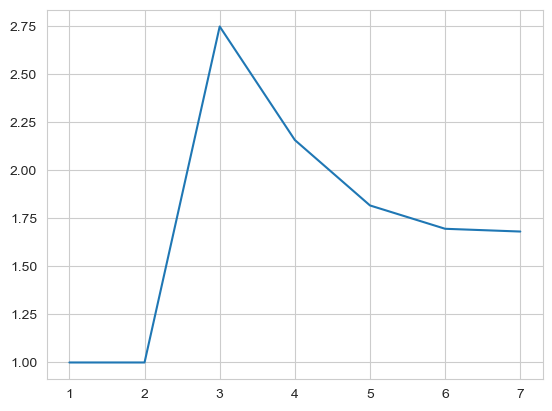

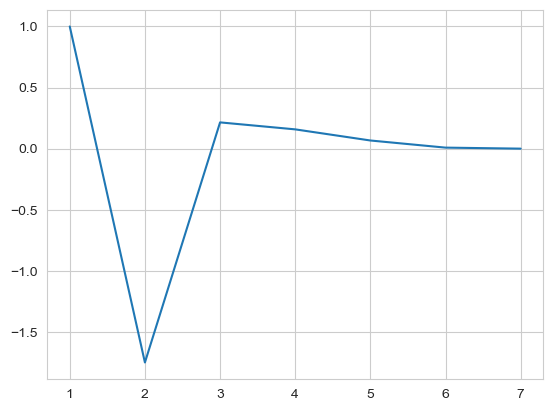

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def f(x):
    return x**4. - 8.
def df(x):
    return 4.*x**3.

N=6
xo=1.
ans=np.array([xo])
er=np.array([1])

for k in range(N):
    xnew=xo-f(xo)/df(xo)
    print(f'N = {k+1} , x = {xnew:0.4f}')
    error=(xo-xnew)/xo
    
    plus=np.array([xo])
    ans=np.append(ans,plus)
    eplus=np.array([error])
    er=np.append(er,eplus)
    
    xo=xnew
    print(f'error = {abs(error):0.4f}\n')
    
sns.set_style("whitegrid")
x=np.linspace(1,len(ans),len(ans))

fig, ax=plt.subplots()
ax.plot(x,ans)
plt.show()

fig, ax=plt.subplots()
ax.plot(x,er)
plt.show()

for 문 역시 시도해보았으며, seaborn 역시 시도해보았다.

Q 12.1, 12.6, 12.13

In [1]:
import numpy as np

A=np.array([[1, 2, 3, 4],
            [2, 6, 7, 8],
            [3, 7, 15, 12],
            [4, 8, 12, 19]])
C=np.array([[51, 52, 53, 54],
            [55, 56, 57, 58],
            [59, 60, 61, 62],
            [63, 64, 65, 66]])
b=np.array([[99],
            [98],
            [97],
            [96]])

Q1=np.transpose(A@b)
print(Q1,'\n')

invA = np.linalg.inv(A)
Q2=invA@A
np.set_printoptions(precision=3)
print(Q2,'\n')

Q3=A@np.transpose(C)
print(Q3)

[[ 970 2233 3590 4168]] 

[[ 1.000e+00  1.776e-15  0.000e+00  3.553e-15]
 [ 0.000e+00  1.000e+00  0.000e+00  0.000e+00]
 [-2.776e-17  0.000e+00  1.000e+00 -1.110e-16]
 [ 0.000e+00  0.000e+00  0.000e+00  1.000e+00]] 

[[ 530  570  610  650]
 [1217 1309 1401 1493]
 [1960 2108 2256 2404]
 [2282 2454 2626 2798]]


두번째 행렬의 값이 이상한 것을 제외하고는 적절하다